# Example: Gaussian Copula
This notebook demonstrates how to use a Gaussian copula to model a simple dataset.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copulas.multivariate import GaussianMultivariate

We'll start by generating a simple dataset with two clusters of values.

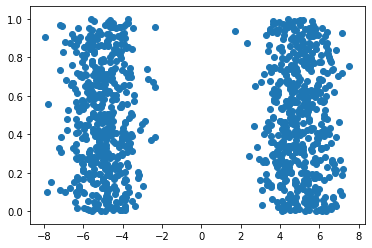

In [2]:
mask = 10*np.random.randint(0, 2, size=1000)-5
x = mask + np.random.normal(size=1000)
y = np.random.uniform(size=1000)
dataset = pd.DataFrame({"x": x, "y": y})
plt.scatter(dataset["x"], dataset["y"]);

We can fit a Gaussian copula with Gaussian marginals. Note that the synthetic dataset constructed from this copula isn't particularly compelling.

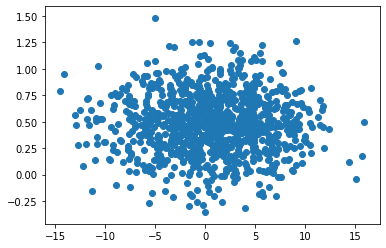

In [3]:
model = GaussianMultivariate(distribution='copulas.univariate.GaussianUnivariate')
model.fit(dataset)
synthetic = model.sample(1000)
plt.scatter(synthetic["x"], synthetic["y"]);

However, if we estimate the marginals with a KDE instead, we are able to recover the two clusters successfully. We can specify that the model should use a Gaussian for the y-axis and a KDE for the x-axis.

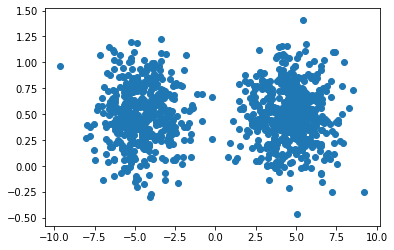

In [4]:
model = GaussianMultivariate(distribution={
    "x": 'copulas.univariate.GaussianKDE',
    "y": 'copulas.univariate.GaussianUnivariate',
})
model.fit(dataset)
synthetic = model.sample(1000)
plt.scatter(synthetic["x"], synthetic["y"]);

Note that if you don't specify the distributions - or if you specify the base class `copulas.univariate.Univariate` - then the best fitting univariate distribution for each column, according to the KS statistic, will be automatically selected for you.

/Users/kevz/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


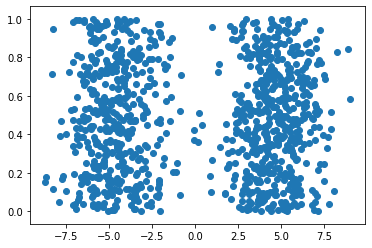

In [5]:
model = GaussianMultivariate()
model.fit(dataset)
synthetic = model.sample(1000)
plt.scatter(synthetic["x"], synthetic["y"]);

This seems to produce the best results! If we peek under the hood, we can see what distributions were automatically selected.

In [6]:
for key, value in model.distribs.items():
    print(key, "~", value._instance)

x ~ <copulas.univariate.gaussian_kde.GaussianKDE object at 0x121c8cfd0>
y ~ <copulas.univariate.truncated_gaussian.TruncatedGaussian object at 0x11f9f0490>


The End.